<a href="https://colab.research.google.com/github/sswayansidha/ML_Models/blob/main/IRIS/iris_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#Read the data
column_headers = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, names=column_headers)
iris.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


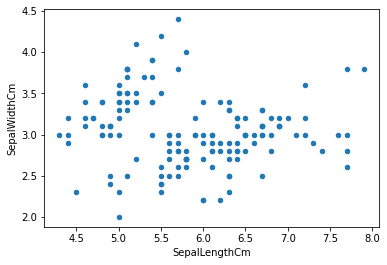

In [10]:
#Visualizing the data using matplotlib, the scatter plot
iris.plot(kind = "scatter",x="SepalLengthCm",y="SepalWidthCm")
plt.show()

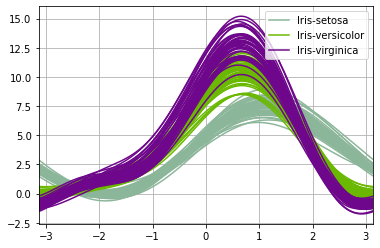

In [14]:
#Visualizing using pandas andrew curves
from pandas.plotting import andrews_curves
andrews_curves(iris,"Species")
plt.show()

Using an inbuilt library called ‘train_test_split’, which divides our data set into a ratio of 80:20. 80% will be used for training, evaluating, and selection among our models and 20% will be held back as a validation dataset.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x = iris.iloc[:,:-1] #last column values excluded

In [19]:
y = iris.iloc[:,-1] # Only last column values

In [21]:
x_train,x_test ,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

**Using Supervised Model: Decision Tree Classifier**

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [23]:
classifier = DecisionTreeClassifier()

In [25]:
#training the data
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
#Predicting
y_pred = classifier.predict(x_test) # making decision

In [29]:
#Print Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [30]:
# Print Confusion Metrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [31]:
#print accuracy
print(accuracy_score(y_test,y_pred))

1.0


**Heatmap for confusion Matrix**

In [32]:
import seaborn as sns

In [36]:
cm = confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm,index = ['setosa','versicolor','virginica'],columns = ['setosa','versicolor','virginica'])

In [34]:
plt.figure(figsize=(5.5,4))

<Figure size 396x288 with 0 Axes>

<Figure size 396x288 with 0 Axes>

Text(0.5, 15.0, 'Predicted Label')

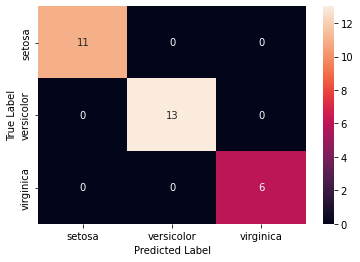

In [39]:
sns.heatmap(cm_df,annot=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')